# Advanced Classification Predict

© Explore Data Science Academy

## Honour Code

I **JULIA MOSOLA**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

In [1]:
#!pip install imblearn --user
#!pip install SpellChecker
#!pip install pyspellchecker

### Import Libraries and Read In the Data

Do not modify or remove any of the code in these cells.

In [2]:
from IPython.display import Image
from IPython.display import IFrame
from IPython import display
import pandas as pd
import numpy as np

import nltk
import sklearn
import imblearn
import csv
%matplotlib inline

from nltk import TreebankWordTokenizer, SnowballStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import  word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.corpus import stopwords

from imblearn.metrics import classification_report_imbalanced

from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import feature_selection
from sklearn.feature_selection import f_classif
from sklearn import metrics
from spellchecker import SpellChecker

from matplotlib import pyplot as plt

import string
import urllib
import math
import re

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\JMOSOLA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JMOSOLA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
train  = pd.read_csv('train.csv')
test = pd.read_csv('test_with_no_labels.csv') # no labels

train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [4]:
train.shape

(15819, 3)

In [5]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [6]:
train.message[6]

'RT @thenation: Mike Pence doesn’t believe in global warming or that smoking causes lung cancer. https://t.co/gvWYaauU8R'

## Overview

Refer to this diagram to guide you while you build your model. Some of the steps will be fleshed out in this template.

![Overview](process_overview_final.jpg)

## Basic preprocessing

Here is a template you may use for your initial base model. 

### Removing URL's
Write a function that removes URL's from a single tweet. 

**Function input:**
- A single string object (tweet) 

**Function output:**
- The tweet with URL's removed as a single object

In [7]:
def replace_urls(df):
    pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    subs_url = r'url-web'
    df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)
    return df

In [8]:
df_clean=replace_urls(train)
df_clean.message[6]

'RT @thenation: Mike Pence doesn’t believe in global warming or that smoking causes lung cancer. url-web'

### Convert to lowercase

Write a function that converts a single tweet to lowercase.

**Function input:**
- A single string object (tweet) 

**Function output:**
- The tweet in lowercase as a single object

In [9]:
def to_lowerd(text):
    return text.lower()

In [10]:
df_clean['message']=df_clean['message'].apply(to_lowerd)
df_clean.message[6]

'rt @thenation: mike pence doesn’t believe in global warming or that smoking causes lung cancer. url-web'

In [11]:
def remove_stopword(text):
    stop = stopwords.words('english')
    return ' '.join([word for word in text.split() if word not in stop])

In [12]:
df_clean['message']=df_clean['message'].apply(remove_stopword)
df_clean.message[6]

'rt @thenation: mike pence doesn’t believe global warming smoking causes lung cancer. url-web'

In [13]:
df_clean.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief think carbon dioxide ma...,625221
1,1,like lack evidence anthropogenic global warming,126103
2,2,rt @rawstory: researchers say three years act ...,698562
3,1,#todayinmaker# wired : 2016 pivotal year war c...,573736
4,1,"rt @soynoviodetodas: 2016, racist, sexist, cli...",466954


In [14]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text


In [15]:
df_clean["message"]=df_clean["message"].apply(remove_punctuations)

In [16]:
df_clean.message[6]

'rt thenation mike pence doesn’t believe global warming smoking causes lung cancer urlweb'

In [17]:
df_clean.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief think carbon dioxide ma...,625221
1,1,like lack evidence anthropogenic global warming,126103
2,2,rt rawstory researchers say three years act cl...,698562
3,1,todayinmaker wired 2016 pivotal year war clim...,573736
4,1,rt soynoviodetodas 2016 racist sexist climate ...,466954


In [18]:
df_clean

,sentiment,message,tweetid
0,1,polyscimajor epa chief think carbon dioxide ma...,625221
1,1,like lack evidence anthropogenic global warming,126103
2,2,rt rawstory researchers say three years act cl...,698562
3,1,todayinmaker wired 2016 pivotal year war clim...,573736
4,1,rt soynoviodetodas 2016 racist sexist climate ...,466954
...,...,...,...
15814,1,rt ezlusztig took material global warming lgbt...,22001
15815,2,rt washingtonpost climate change could breakin...,17856
15816,0,notiven rt nytimesworld what trump actually be...,384248
15817,-1,rt sara8smiles hey liberals climate change cra...,819732


spell=SpellChecker()
def spell_check(texts):
    result=[]
    incorrect_spelling=spell.unknown(texts.split())
    for text in texts.split():
        if text in incorrect_spelling:
            result.append(spell.correction(text))
        else:
            result.append(text)
    return " ".join(result)

df_clean["message"]=df_clean["message"].apply(spell_check)

In [21]:
df_clean.message[3]

'todayinmaker wired  2016 pivotal year war climate change urlweb'

In [22]:
def tt_tokenized(text):
    tk = TweetTokenizer()
    return tk.tokenize(text)



In [23]:
df_clean['message'] =df_clean['message'].apply(tt_tokenized)
df_clean.message[6]

['rt',
 'thenation',
 'mike',
 'pence',
 'doesn',
 '’',
 't',
 'believe',
 'global',
 'warming',
 'smoking',
 'causes',
 'lung',
 'cancer',
 'urlweb']

In [24]:
def lemma(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words] 

In [25]:
#check
lista=("cats","cacti","lovers","loving","run","ran")
lemma(lista)

['cat', 'cactus', 'lover', 'loving', 'run', 'ran']

In [26]:
df_clean['message']= df_clean['message'].apply(lemma)
df_clean.message[6]

['rt',
 'thenation',
 'mike',
 'penny',
 'doesn',
 '’',
 't',
 'believe',
 'global',
 'warming',
 'smoking',
 'cause',
 'lung',
 'cancer',
 'urlweb']

In [27]:
df_clean.head()

,sentiment,message,tweetid
0,1,"[polyscimajor, epa, chief, think, carbon, diox...",625221
1,1,"[like, lack, evidence, anthropogenic, global, ...",126103
2,2,"[rt, rawstory, researcher, say, three, year, a...",698562
3,1,"[todayinmaker, wired, 2016, pivotal, year, war...",573736
4,1,"[rt, soynoviodetodas, 2016, racist, sexist, cl...",466954


In [28]:
df_clean.shape

(15819, 3)

In [29]:
df_clean["message"].head()

0    [polyscimajor, epa, chief, think, carbon, diox...
1    [like, lack, evidence, anthropogenic, global, ...
2    [rt, rawstory, researcher, say, three, year, a...
3    [todayinmaker, wired, 2016, pivotal, year, war...
4    [rt, soynoviodetodas, 2016, racist, sexist, cl...
Name: message, dtype: object

In [30]:
sum_senti=df_clean[['message','sentiment']].groupby('sentiment').count()

In [31]:
sum_senti

,message
sentiment,
-1,1296
0,2353
1,8530
2,3640


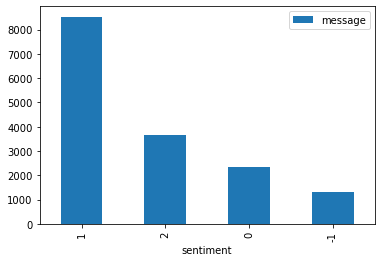

In [32]:
sum_senti.sort_values('message', ascending=False).plot(kind='bar')
plt.show()

### Vectorising 

Vectorise your cleaned data using the vectoriser you defined earlier. Don't forget to fit the vectoriser to the data you just cleaned. Store your vectorised data in `train_vec`.

In [33]:
vecto=TfidfVectorizer(preprocessor=list,tokenizer=list,ngram_range=(1,2),max_features=10000,min_df=2,strip_accents="ascii", smooth_idf=False)
vecto.fit(df_clean['message'])
X=vecto.transform(df_clean['message'])

C:\Users\JMOSOLA\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [34]:
X.shape

(15819, 10000)

In [35]:
X=X.toarray()

In [36]:
Y=df_clean["sentiment"]

In [37]:
Y.head()

0    1
1    1
2    2
3    1
4    1
Name: sentiment, dtype: int64

In [38]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True,test_size=0.2,random_state=42)

In [39]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
y_train

6735     1
13537    2
6876     1
10035    2
5174     0
        ..
13418    1
5390     1
860      1
15795    2
7270     1
Name: sentiment, Length: 12655, dtype: int64

## Fitting a simple model on training data and evaluate its performance

Fit a model on your cleaned data. Use `train_vec` as your features. Note that you need to convert `train_vec` to an array. 

You are familiar with this process, so there is less guidance here. You may also refer to train notebooks and the webinar pdf as guidance.

Your basic model should be a logistic regression, however if you try different models you will also perform the following procedure.

1. Split the training data into features and labels.
2. Split the training data further into training and validation data.
3. Fit the model on the training subset. 
4. Predict on the validation subset.
5. Calculate the performance metrics on the validation predictions.
6. Select a model based on validation performance (when you have more than one model).
8. Clean the test data.
9. Predict on the cleaned test data.
7. Write a csv that matches `sample_submission.csv`.
8. Submit to Kaggle.

In [41]:
#RIDGE CLASSIFIER

In [42]:
from sklearn.linear_model import RidgeClassifier


In [46]:
Rclf_base=RidgeClassifier()
Rclf_base.fit(X_train,y_train)

RidgeClassifier()

In [49]:
Rcf1_pred= Rclf_base.predict(X_test)
F1_Score=f1_score(y_test, Rcf1_pred, average="macro")
F1_Score

0.6597153718039346

In [ ]:
alpha=[1.0,1.5,2.0,2.5]
solver=["svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga", "lbfgs"]
random_grid = {'alpha': alpha,
               'solver': solver}
                             
print(random_grid)


In [ ]:
#Rclf=RidgeClassifier()
Rclf_random=RandomizedSearchCV(estimator = Rclf,
                                param_distributions = random_grid, 
                                n_iter =10, cv = 3,
                                random_state=42)

Rclf_random.fit(X_train, y_train)

In [ ]:
Rcf_pred= Rclf_random.predict(X_test)
f1_score(y_test, Rcf_pred, average="macro")

In [ ]:
#LOGISTIC REGRESSION

In [54]:
MC= ["ovr"]
C=[int(x) for x in range(2,15,1)]
solver=["lbfgs","liblinear"]
verbose=[1,2,3]
# Create the randomgrid
random_grid = {'multi_class': MC,
               'C': C,
               'solver': solver,
               'verbose': verbose}
                             
print(random_grid)

{'multi_class': ['ovr'], 'C': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'solver': ['lbfgs', 'liblinear'], 'verbose': [1, 2, 3]}


In [55]:

rf_rc = LogisticRegression()

rf_random = RandomizedSearchCV(estimator = rf_rc,
                                param_distributions = random_grid, 
                                n_iter =10, cv = 3,
                                random_state=42, n_jobs = -1, error_score="raise")

rf_random.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\JMOSOLA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\JMOSOLA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    ht

RandomizedSearchCV(cv=3, error_score='raise', estimator=LogisticRegression(),
                   n_jobs=-1,
                   param_distributions={'C': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14],
                                        'multi_class': ['ovr'],
                                        'solver': ['lbfgs', 'liblinear'],
                                        'verbose': [1, 2, 3]},
                   random_state=42)

In [56]:
lr_rc_pred= rf_random.predict(X_test)

In [57]:
f1_score(y_test, lr_rc_pred, average="macro")

0.6651300891676323

In [58]:
rf_random.best_params_

{'verbose': 1, 'solver': 'lbfgs', 'multi_class': 'ovr', 'C': 7}

In [ ]:
#SVC BASE

In [ ]:
#SAVING MODELS

In [59]:
import pickle

model_save_path = "log_reg_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(rf_random,file)

In [60]:
model_load_path = "log_reg_model.pkl"
with open(model_load_path,'rb') as file:
    unpickled_model = pickle.load(file)

In [61]:
pred_test=unpickled_model.predict(X_test)

In [62]:
f1_score(y_test, pred_test, average="macro")

0.6651300891676323

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
confusion_matrix(y_test,pred_test)

array([[ 127,   42,   96,   13],
       [  13,  196,  194,   22],
       [  14,  106, 1503,  132],
       [   6,   20,  136,  544]], dtype=int64)

In [65]:
labels=["1:Pro","2:news","0:Neutral","-1:Anti"]
pd.DataFrame(data=confusion_matrix(y_test, pred_test), index=labels, columns=labels)

,1:Pro,2:news,0:Neutral,-1:Anti
1:Pro,127,42,96,13
2:news,13,196,194,22
0:Neutral,14,106,1503,132
-1:Anti,6,20,136,544


In [67]:
#TRANSFORM THE TEST DATA
test=replace_urls(test)

In [70]:
test.message[1]

"Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. url-web"

In [71]:
test["message"]=test["message"].apply(to_lowerd).apply(remove_stopword).apply(remove_punctuations).apply(tt_tokenized).apply(lemma)

In [72]:
test.message[1]

['combine',
 'polling',
 'staffer',
 'climate',
 'change',
 'woman',
 'right',
 'fascist',
 'state',
 'urlweb']

In [73]:
test.head

<bound method NDFrame.head of                                                  message  tweetid
0      [europe, looking, china, make, sure, alone, fi...   169760
1      [combine, polling, staffer, climate, change, w...    35326
2      [scary, unimpeachable, evidence, climate, chan...   224985
3      [karoli, morgfair, osborneink, dailykos, putin...   476263
4      [rt, fakewillmoore, female, orgasm, cause, glo...   872928
...                                                  ...      ...
10541  [rt, brittanybohrer, brb, writing, poem, clima...   895714
10542  [2016, year, climate, change, came, home, hott...   875167
10543  [rt, loopvanuatu, pacific, country, positive, ...    78329
10544  [rt, xanria, 00018, you, ’, re, hot, must, cau...   867455
10545  [rt, chloebalaoing, climate, change, global, i...   470892

[10546 rows x 2 columns]>

In [81]:
X_test1=vecto.transform(test['message'])

In [82]:
X_test1=X_test1.toarray()

In [83]:
X_test1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [84]:
pred_final=unpickled_model.predict(X_test1)

In [86]:
pred_submit=pd.DataFrame(pred_final)

In [88]:
pred_submit.head

<bound method NDFrame.head of        0
0      1
1      1
2      1
3      1
4      0
...   ..
10541  1
10542  1
10543  1
10544  0
10545  1

[10546 rows x 1 columns]>

In [89]:
ids_submit = test[['tweetid']]

In [90]:
ids_submit

,tweetid
0,169760
1,35326
2,224985
3,476263
4,872928
...,...
10541,895714
10542,875167
10543,78329
10544,867455


In [91]:
submit_all = pd.concat([ids_submit.reset_index(drop=True), pred_submit], axis=1).rename(columns = {0:'sentiment'})
submit_all.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0


## Submit your best model predictions 

Don't forget to submit your the predictions on the best model to Kaggle.

In [93]:
# write csv for best predictions
submit_all[['tweetid','sentiment']].to_csv('testsubmission.csv', index=False)
